In [1]:
text = "Amazon,Google+,Instagram|Instagram,Evernote,Amazon,Yahoo|Evernote,Instagram,Google+"

In [3]:
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np

In [4]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts([text])

In [5]:
vocabulary_size = len(tokenizer.word_index) + 1
print('Unique items: %d' % vocabulary_size)

Unique items: 6


In [6]:
sequences = list()
for line in text.split('|'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    sequences.append(encoded)
print('Total Sequences: %d' % len(sequences))
print(sequences)

Total Sequences: 3
[[2, 3, 1], [1, 4, 2, 5], [4, 1, 3]]


In [7]:
max_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences)
print('Max Sequence Length: %d' % max_len)
sequences = np.array(sequences)

[[0 2 3 1]
 [1 4 2 5]
 [0 4 1 3]]
Max Sequence Length: 4


In [8]:
X, y = sequences[:, :-1], sequences[:, -1]
print(X)
print(y)

[[0 2 3]
 [1 4 2]
 [0 4 1]]
[1 5 3]


In [9]:
y = to_categorical(y, num_classes=vocabulary_size)
print(y)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


In [10]:
from keras import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense

In [11]:
model = Sequential()
model.add(Embedding(vocabulary_size, 5, input_length=max_len - 1))
model.add(Dropout(0.2))
model.add(LSTM(3))
model.add(Dropout(0.2))
model.add(Dense(vocabulary_size, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
X.shape, y.shape

((3, 3), (3, 6))

In [13]:
h = model.fit(X, y, validation_split=0.2, verbose=1, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.7850 - acc: 0.5000 - val_loss: 1.7898 - val_acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 1.7860 - acc: 0.5000 - val_loss: 1.7901 - val_acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 1.7880 - acc: 0.5000 - val_loss: 1.7901 - val_acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 1.7766 - acc: 0.5000 - val_loss: 1.7903 - val_acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 1.7830 - acc: 1.0000 - val_loss: 1.7903 - val_acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 1.7806 - acc: 0.5000 - val_loss: 1.7904 - val_acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 32ms/step - loss: 1.7734 - acc: 1.0000 - val_loss: 1.7905 - val_acc: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 30ms/step - loss: 

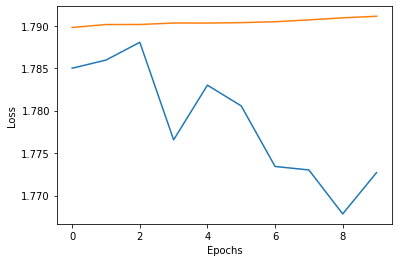

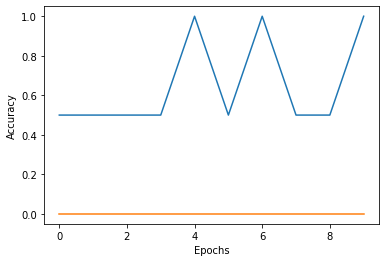

In [14]:
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [18]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    for _ in range(n_words):
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        yhat = np.argmax(model.predict(encoded), axis=-1)
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [19]:
print(generate_seq(model, tokenizer, 3, '1 3 5', 1))

instagram
